# Small Mean-Reverting Portfolios



In [1]:
from src.data_request import BloombergAPI
from datetime import datetime
import pandas as pd
import numpy  as np

import warnings
warnings.filterwarnings('ignore')

securities = {'ED5 Comdty'    : {'Symbol':'ED5 Comdty'},
              'ED6 Comdty'    : {'Symbol':'ED6 Comdty'},
              'ED7 Comdty'    : {'Symbol':'ED7 Comdty'},
              'ED8 Comdty'    : {'Symbol':'ED8 Comdty'},
              'ED9 Comdty'    : {'Symbol':'ED9 Comdty'},
                       }

symbols = [ securities[s]['Symbol'] for s in list(securities.keys())]



In [2]:
print('Selected symbols are: ',symbols)

Selected symbols are:  ['ED5 Comdty', 'ED6 Comdty', 'ED7 Comdty', 'ED8 Comdty', 'ED9 Comdty']


# Data Exploration

The data we use here comes from Bloomberg. The code below utilizes the Bloombergs Python API to pull data directly from Bloombergs servers. After downloading the data lets plot the it to make sure it makes sense :)

In [3]:
# Download data for traded instruments
data_handler = BloombergAPI(SERVER_HOST='localhost',SERVER_PORT=8194)
start_date   = datetime(1990,1,1)
end_date     = datetime.today()
price_data   = []
for symbol in symbols:
    print('Downloading data for symbol :',symbol)
    try:
        data = data_handler.send_request([symbol],["PX_LAST"],start_date,end_date)
        if(len(data[symbol])!=0):
            f = pd.DataFrame.from_dict(data[symbol],orient='index')
            f.columns = [symbol]
            price_data.append(f.copy())
    except:
        print(f"Could not download data for {symbol}")

price_data       = pd.concat(price_data,axis=1)
price_data.index = pd.DatetimeIndex(price_data.index)



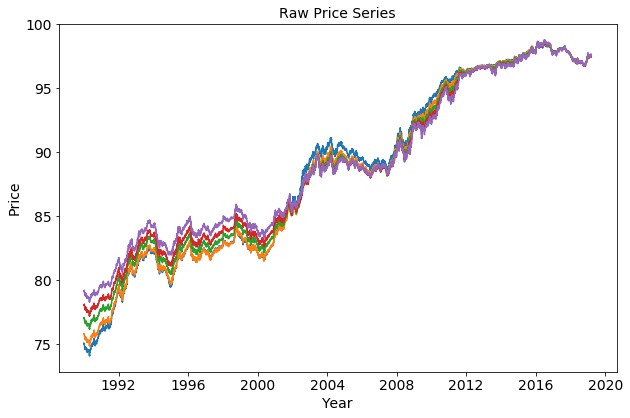

In [6]:
# Lets plot the data
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6.4))
plt.plot(price_data)
plt.ylabel('Price',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Raw Price Series',fontsize=14)
plt.show()


# VAR Model Estimation

 

In [57]:
import statsmodels.tsa.api

#help(statsmodels.tsa.api.VAR)

mdl     = statsmodels.tsa.api.VAR(price_data.as_matrix(),missing='drop')
results = mdl.fit(maxlags=1)

print(results.summary())

b_hat = results.params[0,:]
A_hat = results.params[1:,:]

g = price_data.cov().as_matrix()

print(Gamma_hat)


def eta(x,A,G):
    
    d = np.transpose(x).dot(np.transpose(A)).dot(G).dot(x)
    n = np.transpose(x).dot(G).dot(x)
    return d/n
    
    

    


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 13, Mar, 2019
Time:                     13:18:07
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                   -45.6693
Nobs:                     7375.00    HQIC:                  -45.6878
Log likelihood:           116216.    FPE:                1.42514e-20
AIC:                     -45.6974    Det(Omega_mle):     1.41936e-20
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.016908         0.037940            0.446           0.656
L1.y1         1.017245         0.009585          106.131           0.000
L1.y2        -0.065910         0.026447           -2.492           0.013
L1.y3         0.102377

In [64]:
# Estimate matrix A from Equation (6) page 4
S     = price_data.dropna()
S_lag = price_data.shift(1).dropna()
S     = S.loc[S_lag.index].as_matrix()
S_lag = S_lag.as_matrix()


A_1   = np.linalg.pinv(np.transpose(S_lag).dot(S_lag))
A_2   = np.transpose(S_lag).dot(S)
print(S)
print(A_1)
print(A_2)

[[74.977 75.713 76.964 78.008 79.104]
 [75.018 75.762 77.015 78.067 79.165]
 [74.994 75.746 77.006 78.059 79.156]
 ...
 [97.44  97.49  97.54  97.555 97.595]
 [97.475 97.535 97.585 97.6   97.64 ]
 [97.455 97.515 97.565 97.58  97.62 ]]
[[ 0.00951395 -0.0291767   0.01814885  0.01892286 -0.01741165]
 [-0.0291767   0.11309934 -0.11358023 -0.01872169  0.04839218]
 [ 0.01814885 -0.11358023  0.23424598 -0.16824657  0.0293581 ]
 [ 0.01892286 -0.01872169 -0.16824657  0.30616077 -0.1380033 ]
 [-0.01741165  0.04839218  0.0293581  -0.1380033   0.07761633]]
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]
